In [1]:
import numpy as np
import os 
from pathlib import Path
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sources import utils_spec, loss, models, MMFusion_Model
import matplotlib.pyplot as plt

### **A) Define the touchgesture model:**

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
touchModel = MMFusion_Model.TouchGestureModel(input_size=4, hidden_size=256, seq_length=1250, num_layers=2, batch_size=16, num_classes=100).to(device)

### **B) Define the spectrogram model:**

In [3]:
specModel = MMFusion_Model.SpectrogramModel(num_classes=100).to(device)

In [4]:
def testSpec(model, input):
    x = input.to(device)
    y0 = model(x)
    print("Output shape of spectrogram model: \n", y0.shape)
    print(y0)
    return y0

def testTouch(model, in_planes):
    x = torch.randn(16, in_planes, 1250)
    x = x.to(device)
    y0 = model(x)
    print("output shape of touch model: \n", y0.shape)
    print(y0)
    return y0

In [5]:
x_spec = torch.randn(16, 3, 65, 71)
y_spec = testSpec(specModel, input = x_spec)
y_touch = testTouch(touchModel, in_planes=4)

Output shape of spectrogram model: 
 torch.Size([16, 256])
tensor([[ 0.0633, -0.1632, -0.1991,  ...,  0.3370,  0.1835,  0.1026],
        [-0.2353,  0.0680, -0.4208,  ...,  0.0137,  0.9542,  0.2309],
        [-0.3485, -0.5290, -0.0543,  ...,  0.4654,  0.0636,  0.5029],
        ...,
        [-0.0782, -0.2871, -0.0479,  ..., -0.3285, -0.1606, -0.1179],
        [-0.5595, -0.0885, -0.3090,  ...,  0.4209,  0.0761,  0.0301],
        [-0.4362,  0.1204, -0.5241,  ..., -0.4228,  0.1319,  0.3102]],
       grad_fn=<AddmmBackward0>)
output shape of touch model: 
 torch.Size([16, 256])
tensor([[-0.0273,  0.3143, -0.5997,  ..., -0.0402, -0.6477, -0.1597],
        [-0.3283,  0.2743,  0.1533,  ...,  0.2690,  0.2131, -0.7160],
        [-0.1119,  0.1170,  0.2501,  ...,  0.6674, -0.4798,  0.1045],
        ...,
        [-0.5351, -0.3542, -0.2944,  ...,  0.5684, -0.0594, -0.2096],
        [-0.3455,  0.0378,  0.3939,  ..., -0.4248,  0.3016, -0.6531],
        [-0.4183,  0.0518, -0.0713,  ...,  0.1132,  0.1742

In [6]:
Logs, touch_ds, y = utils_spec.dataGenerator(numUsers=39, session=10)

userID 0


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


userID 1


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


userID 2


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


userID 3


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


userID 4


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


userID 5


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


userID 6


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


userID 7


100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


userID 8


100%|██████████| 10/10 [00:03<00:00,  2.80it/s]


userID 9


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


userID 10


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


userID 11


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


userID 12


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


userID 13


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


userID 14


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


userID 15


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


userID 16


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


userID 17


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


userID 18


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


userID 19


100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


userID 20


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


userID 21


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


userID 22


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


userID 23


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


userID 24


100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


userID 25


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


userID 26


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


userID 27


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


userID 28


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


userID 29


100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


userID 30


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


userID 31


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


userID 32


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


userID 33


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


userID 34


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


userID 35


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


userID 36


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


userID 37


100%|██████████| 10/10 [00:03<00:00,  2.65it/s]


userID 38


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


userID 39


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

(400, 10000, 3)
(400, 10000, 4)
(400,)


### Shape of Logs: (2, 10000, 3), because I have computed the norm for each sensor before loading them

In [7]:
numof_chunks = 8 # divide data on multu chunks (numof_chunks = 1 -> process the hole csv file)

Logs_2 = Logs.reshape(Logs.shape[0] * numof_chunks, Logs.shape[1]//numof_chunks, -1)

y_labels = []

for y0 in y:
    y_labels.append(np.zeros(numof_chunks) + y0)

y_labels = np.reshape(y_labels, -1)

print(Logs_2.shape)
print(y_labels.shape)

(3200, 1250, 3)
(3200,)


In [8]:
touch_logs = touch_ds.reshape(touch_ds.shape[0]*numof_chunks, touch_ds.shape[1]//numof_chunks, -1)
print(touch_logs.shape)

(3200, 1250, 4)


In [9]:
x_spec = []
y_spec = []

#transpose data, fourier transform is applied on horizontal data
X = np.transpose(Logs_2, axes = [0, -1, 1])
print(X.shape)

for i, x in enumerate(tqdm(X)):
    x = abs(tf.signal.stft(x, 128, 16))
    x_spec.append(x)#, window_fn=window_fn))
    
x_spec = np.stack(x_spec)

#put the number of channels in the last axe to have the same data format supported by TensorFlow (9 channels) 
x_spec = np.transpose(x_spec, axes = [0, 3, 2, 1])
# config originale: [0, 3, 2, 1]

print(x_spec.shape)


(3200, 3, 1250)


100%|██████████| 3200/3200 [00:19<00:00, 164.11it/s]


(3200, 65, 71, 3)


(65, 71, 3)


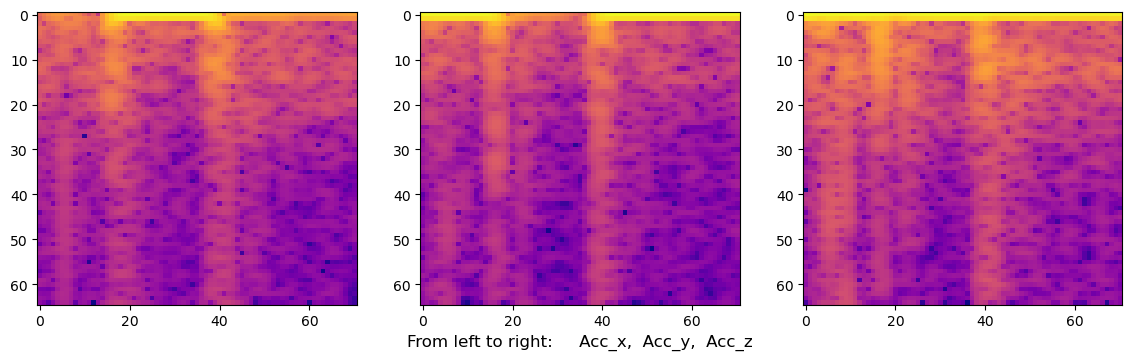

In [10]:
print(x_spec[0].shape)

sample = 0
#sample = 50

title = ["Accelerometer", "Gyro", "Magnetometer"]
for i in range(3):
    plt.figure(figsize = (14, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(10*np.log10(x_spec[sample, :, :, 0] + 1e-4), cmap='plasma')
    #plt.ylabel("Frequency", fontsize = 12)
    plt.subplot(1, 3, 2)
    plt.imshow(10*np.log10(x_spec[sample, :, :, 1] + 1e-4), cmap='plasma')
    plt.xlabel("From left to right:     Acc_x,  Acc_y,  Acc_z", fontsize = 12)
    #plt.title(title[i] + " - userID:{}".format(int(y2[sample])), fontsize = 12)
    plt.subplot(1, 3, 3)
    plt.imshow(10*np.log10(x_spec[sample, :, :, 2] + 1e-4), cmap='plasma')
    
    plt.show()
    break

In [11]:
sensorFusion = MMFusion_Model.fusionFFN(num_logits=256).to(device)
touchFusion = MMFusion_Model.fusionFFN(num_logits=256).to(device)

fusion_model = MMFusion_Model.pred_model(sensorModelPred=specModel, touchModelPred=touchModel, sensorFusionPred=sensorFusion, touchFusionPred=touchFusion,  fusion=True).to(device)

In [12]:
def test_fusion_pred():
    x1 = torch.randn(16, 3, 65, 71).to(device)
    x2 = torch.randn(16,4, 1250).to(device)
    y_i, y_j, y_fi, y_fj = fusion_model(x1, x2)
    return y_i, y_j, y_fi, y_fj

y0, y1, y2, y3 =test_fusion_pred()

In [13]:
print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16, 256])


In [14]:
x_train_sensor, x_test_sensor, y_train_sensor, y_test_sensor = train_test_split(x_spec, y_labels, test_size=0.2, shuffle=True, random_state=10)
x_train_touch, x_test_touch, y_train_touch, y_test_touch = train_test_split(touch_logs, y_labels, test_size=0.2, shuffle=True, random_state=10)

### **Dataset:**

In [15]:
class contrastiveDataset(Dataset):
    
    def __init__(self, X_i, X_j, transform=None):

        self.sensorData = np.array(X_i)
        self.touchData = np.array(X_j)
        
        self.transform = transform

    def __getitem__(self, i):
        x_i = self.sensorData[i]
        x_j = self.touchData[i]
        

        x_i = self.transform(x_i)
        x_j = self.transform(x_j)

        return (x_i, x_j)
    
    def __len__(self):
        return len(self.sensorData)

In [16]:
transform = transforms.Compose([transforms.ToTensor()])
train_set = contrastiveDataset(X_i=x_train_sensor, X_j=x_train_touch, transform=transform)
test_set = contrastiveDataset(X_i=x_test_sensor, X_j = x_test_touch, transform=transform)

In [17]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, drop_last=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=True, drop_last=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##### **C ) Display the data from train and test loaders**

In [18]:
for i, (x1, x2) in enumerate(train_loader):
    x1 = np.squeeze(x1, axis=1)
    x2 = np.squeeze(x2, axis=1)
    print("Train Sample: ", i)
    print("X1 shape: {}".format(x1.shape))
    print("X2 shape: {}".format(x2.shape))
    break

Train Sample:  0
X1 shape: torch.Size([16, 3, 65, 71])
X2 shape: torch.Size([16, 1250, 4])


In [19]:
for i, (x1, x2) in enumerate(test_loader):
    x1 = np.squeeze(x1, axis=1)
    x2 = np.squeeze(x2, axis=1)
    print("Train Sample: ", i)
    print("X1 shape: {}".format(x1.shape))
    print("X2 shape: {}".format(x2.shape))
    break

Train Sample:  0
X1 shape: torch.Size([16, 3, 65, 71])
X2 shape: torch.Size([16, 1250, 4])


In [20]:
'''
Self Supervised pre-training with fusion model
'''
model_history = {'train_loss':[], 'validation_loss':[]}
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if not os.path.isdir('pretrained_models/fusion/HMOG'):
    os.mkdir('pretrained_models/fusion/HMOG')
path = 'pretrained_models/fusion/HMOG/'


def save_checkpoint(state, model='model'):

    filename = str(model) + '.pth'
    path_folder = os.path.join(path, filename)
    print("=>> Saving check_point...")
    torch.save(state, path_folder)

def train_test_loop(model, train_loader, test_loader, loss, epochs, check_point='model'):
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4, nesterov=True)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=250, gamma=0.1)
    criterion = loss.Contrastive_Loss(batch_size=16, temperature=0.5)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        total = 0

        if epoch == epochs-1:
            state = model.state_dict()
            
            save_checkpoint(state=state, model=check_point)
            
        for step, (x_i, x_j) in enumerate(train_loader):
            
            optimizer.zero_grad()
            x_i = x_i.squeeze().to(device).float()
            x_j = x_j.squeeze().to(device).float()
            
            z_i, z_j, z_fi, z_fj = model(x_i, x_j)
            
            
            loss1 = criterion(z_i, z_j)

            loss2 = criterion(z_fi, z_fj)

            loss = loss1 + loss2
            
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item()
            
            total += x_i.size(0)
            
        model_history['train_loss'].append(train_loss/total)

        model.eval()
        test_loss = 0
        total = 0
        with torch.no_grad():
            for step, (x_i, x_j) in enumerate(test_loader):
                
                x_i = x_i.squeeze().to(device).float()
                x_j = x_j.squeeze().to(device).float()
                
                z_i, z_j, z_fi, z_fj = model(x_i, x_j)

                loss1 = criterion(z_i, z_j)
                
                loss2 = criterion(z_fi, z_fj)

                loss = loss1 + loss2
                
                test_loss += loss.item()
                total += x_i.size(0)

                
            model_history['validation_loss'].append(test_loss/total)

        print(
            "Epoch: ", epoch,
            "Loss: ", test_loss/total,
            "Total is: ",total
        )  
        
    return model_history

In [21]:
def plot_values(model_dict):
    x_axis = range(0,len(model_dict["train_loss"]))
    fig, ax = plt.subplots(dpi=100)
    ax.plot(x_axis, model_dict['train_loss'], '-', label='Training loss')
    ax.plot(x_axis, model_dict['validation_loss'], '-', label='Validation loss', color='r')
    ax.legend()
    plt.ylabel('Contrastive Loss Function')
    ax.grid()
    plt.show()

Epoch:  0 Loss:  0.3547694690525532 Total is:  640
Epoch:  1 Loss:  0.3477419488132 Total is:  640
Epoch:  2 Loss:  0.339847507327795 Total is:  640
Epoch:  3 Loss:  0.34107223600149156 Total is:  640
Epoch:  4 Loss:  0.33540449365973474 Total is:  640
Epoch:  5 Loss:  0.33385988846421244 Total is:  640
Epoch:  6 Loss:  0.33666050210595133 Total is:  640
Epoch:  7 Loss:  0.3387994147837162 Total is:  640
Epoch:  8 Loss:  0.3339925304055214 Total is:  640
Epoch:  9 Loss:  0.34155197590589526 Total is:  640
Epoch:  10 Loss:  0.33020918145775796 Total is:  640
Epoch:  11 Loss:  0.3265080347657204 Total is:  640
Epoch:  12 Loss:  0.32721803784370423 Total is:  640
Epoch:  13 Loss:  0.32357136011123655 Total is:  640
Epoch:  14 Loss:  0.32122054770588876 Total is:  640
Epoch:  15 Loss:  0.3227573484182358 Total is:  640
Epoch:  16 Loss:  0.3197453632950783 Total is:  640
Epoch:  17 Loss:  0.3287549167871475 Total is:  640
Epoch:  18 Loss:  0.3184245266020298 Total is:  640
Epoch:  19 Loss: 

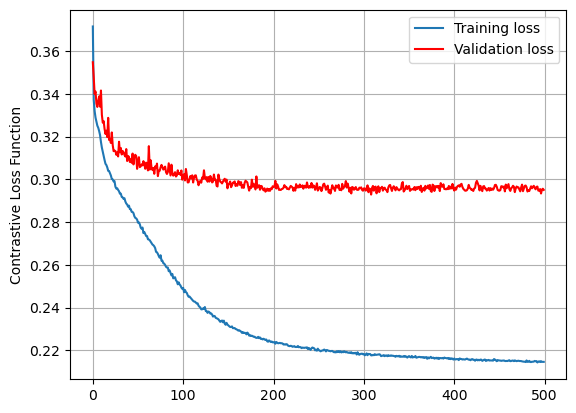

In [22]:
model_dict = train_test_loop(model=fusion_model, train_loader=train_loader, test_loader=test_loader, loss=loss, epochs=500, check_point='ConvRNN_Model')
plot_values(model_dict)